# Problem Set 3


# Question 1

Introduction:<br>
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.<br>
Occupations
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address. <br>
Step 3. Assign it to a variable called users<br>
Step 4. Discover what is the mean age per occupation<br>
Step 5. Discover the Male ratio per occupation and sort it from the most to the least <br>
Step 6. For each occupation, calculate the minimum and maximum ages<br>
Step 7. For each combination of occupation and sex, calculate the mean age <br>
Step 8. For each occupation present the percentage of women and men<br>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

users = pd.read_csv(url,delimiter = '|')

1. Calculate mean age per occupation

In [2]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()

print(mean_age_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


2. Calculate male ratio per occupation

In [3]:
male_ratio_by_occupation = users.groupby('occupation')['gender'].agg(lambda x: (x == 'M').sum() / len(x))

3. Sort by male ratio in descending order

In [4]:
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)

print(male_ratio_by_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


4. Calculate minimum and maximum ages per occupation

In [5]:
min_max_age_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(min_max_age_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


5. Calculate mean age per occupation and sex


In [6]:
mean_age_by_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_by_occupation_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

6. Calculate percentage of women and men per occupation

In [7]:
total_by_occupation_gender = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

total_by_occupation = users.groupby('occupation').agg('count')

percentage_by_occupation_gender = (total_by_occupation_gender.div(total_by_occupation, level = "occupation") * 100).round(2)

print(percentage_by_occupation_gender)

                      age  gender  user_id  zip_code
occupation    gender                                
administrator F       NaN   45.57      NaN       NaN
              M       NaN   54.43      NaN       NaN
artist        F       NaN   46.43      NaN       NaN
              M       NaN   53.57      NaN       NaN
doctor        M       NaN  100.00      NaN       NaN
educator      F       NaN   27.37      NaN       NaN
              M       NaN   72.63      NaN       NaN
engineer      F       NaN    2.99      NaN       NaN
              M       NaN   97.01      NaN       NaN
entertainment F       NaN   11.11      NaN       NaN
              M       NaN   88.89      NaN       NaN
executive     F       NaN    9.38      NaN       NaN
              M       NaN   90.62      NaN       NaN
healthcare    F       NaN   68.75      NaN       NaN
              M       NaN   31.25      NaN       NaN
homemaker     F       NaN   85.71      NaN       NaN
              M       NaN   14.29      NaN    

## Question 2

Euro Teams<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address<br>
Step 3. Assign it to a variable called euro12 <br>
Step 4. Select only the Goal column<br>
Step 5. How many team participated in the Euro2012? <br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline<br>
Step 8. Sort the teams by Red Cards, then to Yellow Cards <br>
Step 9. Calculate the mean Yellow Cards given per Team<br>
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G<br>
Step 12. Select the first 7 columns<br>
Step 13. Select all columns except the last 3<br>
Step 14. Present only the Shooting Accuracy from England, Italy and Russia<br>


In [8]:
import pandas as pd
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

1. Select only the "Goal" column

In [9]:
goals = euro12["Goals"]
print(goals.head())

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64


2. Get the number of unique teams in the "Team" column

In [10]:
num_teams = euro12["Team"].nunique()
print("Number of teams: ", num_teams)

Number of teams:  16


3. Get the number of columns in the Data

In [11]:
num_cols = euro12.shape[1]

print("Number of columns: ", num_cols)

Number of columns:  35


4. Select only the "Team", "Yellow Cards", and "Red Cards" columns

In [12]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

print(discipline.head())

             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


5. Sort the teams by "Red Cards" first, then by "Yellow Cards"

In [13]:
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]].sort_values(["Red Cards", "Yellow Cards"], ascending=[False, False])

print(discipline.head())

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0


6. Calculate the mean "Yellow Cards" given per team

In [14]:
mean_yellow_cards = euro12["Yellow Cards"].mean()

print("Mean Yellow Cards per team:", mean_yellow_cards)

Mean Yellow Cards per team: 7.4375


7. Select the teams that start with "G"

In [15]:
g_teams = euro12[euro12["Team"].str.startswith("G")]

print(g_teams)

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


8. Select the first 7 columns

In [16]:
first_7_cols = euro12.iloc[:, :7]

print(first_7_cols.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  
0            16.0%                          32  
1            12.9%                          39  
2            20.0%                          27  
3            17.2%                          40  
4             6.5%                          65  


9. Select all columns except the last 3

In [17]:
all_except_last_3_cols = euro12.iloc[:, :-3]

print(all_except_last_3_cols.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Clean Sh

10. Select the Shooting Accuracy for England, Italy, and Russia

In [18]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3

Housing<br>
Step 1. Import the necessary libraries<br>
Step 2. Create 3 differents Series, each of length 100, as follows:<br>
• The first a random number from 1 to 4<br>
• The second a random number from 1 to 3<br>
• The third a random number from 10,000 to 30,000 <br>
Step 3. Create a DataFrame by joinning the Series by column<br>
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter<br>
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'<br>
Step 6. Ops it seems it is going only until index 99. Is it true? <br>
Step 7. Reindex the DataFrame so it goes from 0 to 299<br>

1. Import the necessary libraries

In [19]:
import pandas as pd

import numpy as np

import random

2. Create 3 differents Series, each of length 100, as follows:<br>
• The first a random number from 1 to 4<br>
• The second a random number from 1 to 3<br>
• The third a random number from 10,000 to 30,000<br>

In [20]:
first = pd.Series(np.random.randint(1,4,100))

second = pd.Series(np.random.randint(1,3,100))

third = pd.Series(np.random.randint(1000,30000,100))

3. Create a DataFrame by joinning the Series by column

In [21]:
table1 = pd.concat([first,second,third],axis=1)

table1

,0,1,2
0,1,1,21459
1,2,1,21203
2,2,1,6480
3,1,1,1749
4,3,2,27807
...,...,...,...
95,1,2,7922
96,1,1,3975
97,1,1,19721
98,1,2,6238


4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [22]:
table1.columns = ['bedrs','bathrs','price_sqr_meter']

table1.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,21459
1,2,1,21203
2,2,1,6480
3,1,1,1749
4,3,2,27807


5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [23]:
bigcolumn = pd.concat([first,second,third],axis=0)

bigcolumn

0         1
1         2
2         2
3         1
4         3
      ...  
95     7922
96     3975
97    19721
98     6238
99    14991
Length: 300, dtype: int32

6. Ops it seems it is going only until index 99. Is it true?

In [24]:
len(bigcolumn)

300

7. Reindex the DataFrame so it goes from 0 to 299

In [25]:
bigcolumn.reset_index(drop=True, inplace=True)

bigcolumn


0          1
1          2
2          2
3          1
4          3
       ...  
295     7922
296     3975
297    19721
298     6238
299    14991
Length: 300, dtype: int32

# Question 4

Wind Statistics<br>
The data have been modified to contain some missing values, identified by NaN. <br>
Using pandas should make this exercise easier, in particular for the bonus question.<br>
You should be able to perform all of these operations without using a for loop or other looping construct.<br>
The data in 'wind.data' has the following format:<br>
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL<br>
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04<br>
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83<br>
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71<br>
<br>
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in reland on that day.<br>
Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from the attached file wind.txt<br>
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.<br>
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.<br>
Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].<br>
Step 6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.<br>
Step 7. Compute how many non-missing values there are in total.<br>
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
all the times.
A single number for the entire dataset.<br>
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.<br>
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.<br>
Step 11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.<br>
Step 12. Downsample the record to a yearly frequency for each location.<br> 
Step 13. Downsample the record to a monthly frequency for each location. <br>
Step 14. Downsample the record to a weekly frequency for each location.<br>
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on<br>

1. Import the necessary libraries

In [26]:
import pandas as pd
import numpy as np
import datetime

2. Import the dataset from the attached file wind.txt

In [27]:
data = pd.read_csv('wind.txt', sep='\s+', parse_dates=[[0, 1, 2]])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


3. Assign it to a variable called data and replace the first 3 columns by a proper 
datetime index.

In [28]:
data.columns = ['Date', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


4. Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.

In [29]:
def fix_year(date):
    if date.year > 2000:
        print(date.year)
        return datetime.date(date.year - 100, date.month, date.day)
    return date

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


5. Set the right dates as the index. Pay attention at the data type, it should be 
datetime64[ns].

In [30]:
data.index = pd.to_datetime(data.index)

6. Compute how many values are missing for each location over the entire 
record.They should be ignored in all calculations below.

In [31]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

7. Compute how many non-missing values there are in total.

In [32]:
print(f"Total non-missing values:{data.notnull().sum().sum()}")

Total non-missing values:78857


 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [33]:
print(f"Mean windspeeds for all location: { data.mean().mean()}")

Mean windspeeds for all location: 10.227982360836924


9. Create a DataFrame called loc_stats and calculate the min, max and mean 
windspeeds and standard deviations of the windspeeds at each location over all the 
days
A different set of numbers for each location.

In [34]:
data.agg(['min', 'max', 'mean', 'std'])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


 10. Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day.


In [35]:
day_stats = data.T.agg(['min', 'max', 'mean', 'std'])
print(day_stats)

Date  2061-01-01  2061-01-02  2061-01-03  2061-01-04  2061-01-05  2061-01-06  \
min     9.290000    6.500000    6.170000    1.790000    6.170000    4.420000   
max    18.500000   17.540000   18.500000   11.750000   13.330000   13.210000   
mean   13.018182   11.336364   11.641818    6.619167   10.630000    8.240000   
std     2.808875    3.188994    3.681912    3.198126    2.445356    2.998063   

Date  2061-01-07  2061-01-08  2061-01-09  2061-01-10  ...  1978-12-22  \
min     4.960000    5.910000    4.750000     6.54000  ...    2.460000   
max    14.290000   16.620000   15.370000    19.50000  ...   13.080000   
mean   10.385000   10.487500    9.897500    10.47750  ...    7.000833   
std     3.072114    3.547237    2.905954     3.44261  ...    3.237337   

Date  1978-12-23  1978-12-24  1978-12-25  1978-12-26  1978-12-27  1978-12-28  \
min     9.500000    4.790000    0.750000    1.960000    8.080000    5.000000   
max    22.210000   31.710000   13.960000   13.830000   40.080000   41.460

11. Find the average windspeed in January for each location. 
Treat January 1961 and January 1962 both as January.

In [36]:
data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

12. Downsample the record to a yearly frequency for each location. 

In [37]:
data.resample('Y').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-12-31,11.828466,10.680493,10.680493,5.547863,9.640877,6.548740,8.482110,7.614274,8.245534,7.812411,12.169699,15.441096
1974-12-31,13.643096,11.811781,12.336356,6.427041,11.110986,6.809781,10.084603,9.896986,9.331753,8.736356,13.252959,16.947671
1975-12-31,12.008575,10.293836,11.564712,5.269096,9.190082,5.668521,8.562603,7.843836,8.797945,7.382822,12.631671,15.307863
1976-12-31,11.737842,10.203115,10.761230,5.109426,8.846339,6.311038,9.149126,7.146202,8.883716,7.883087,12.332377,15.471448
1977-12-31,13.099616,11.144493,12.627836,6.073945,10.003836,8.586438,11.523205,8.378384,9.098192,8.821616,13.459068,16.590849
...,...,...,...,...,...,...,...,...,...,...,...,...
2068-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
2069-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
2070-12-31,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


13. Downsample the record to a monthly frequency for each location.

In [38]:
data.resample('M').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-31,13.177742,12.202903,10.860968,5.454516,9.327419,7.419677,10.738710,7.880000,8.651290,7.596774,12.076452,14.684516
1973-02-28,14.411071,13.129643,10.126786,6.708929,12.078214,7.673929,10.943571,8.951071,10.840357,8.923214,14.941071,18.833571
1973-03-31,11.840645,11.706452,10.771290,5.574516,9.494516,6.273871,8.374194,8.080968,8.311935,7.856129,12.209677,15.496452
1973-04-30,13.827667,11.922667,13.310333,7.525333,10.236000,8.213000,10.935667,9.102000,10.109000,10.051000,13.134000,16.795000
1973-05-31,12.786129,11.152258,11.188387,6.472258,10.801290,8.265484,9.048065,8.895161,9.909355,8.887419,11.650645,15.821935
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-08-31,9.822581,6.824194,9.757097,4.443871,6.490323,4.565484,8.524194,5.536452,7.302581,5.746774,9.592258,12.696452
2072-09-30,9.247333,7.534000,10.230667,3.791667,5.322333,3.580333,6.846333,5.241000,5.628000,4.171667,9.379000,10.560000
2072-10-31,11.489677,9.816774,11.952903,5.230968,7.185484,5.014516,9.021290,7.967097,7.726129,6.436774,11.919677,14.347742


14. Downsample the record to a weekly frequency for each location

In [39]:
data.resample('W').mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1973-01-07,10.232857,9.808571,9.625714,3.778571,5.477143,4.868571,7.250000,4.597143,5.851429,4.314286,6.872857,7.470000
1973-01-14,15.321429,12.945714,12.935714,6.167143,10.128571,8.452857,9.434286,7.768571,8.004286,7.295714,10.671429,13.350000
1973-01-21,13.108571,11.118571,11.511429,6.454286,10.124286,7.864286,13.940000,7.905714,10.052857,9.957143,13.774286,21.265714
1973-01-28,13.880000,13.828571,10.168571,5.308571,11.178571,8.381429,11.878571,10.457143,10.207143,8.052857,15.477143,16.310000
1973-02-04,12.870000,12.214286,8.381429,5.204286,8.902857,6.342857,9.091429,7.900000,8.191429,7.992857,13.681429,13.415714
...,...,...,...,...,...,...,...,...,...,...,...,...
2072-12-04,15.422857,17.060000,12.874286,7.344286,11.495714,9.650000,14.695714,10.345714,10.357143,9.695714,16.191429,19.784286
2072-12-11,16.608571,16.554286,13.665714,6.861429,12.411429,10.328571,14.790000,10.678571,10.214286,10.210000,17.547143,19.607143
2072-12-18,17.917143,19.572857,16.711429,10.804286,14.940000,12.778571,15.614286,14.367143,12.125714,11.751429,20.471429,23.408571


15. Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [40]:
data.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[1:53]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1973-01-14   7.75  22.37  15.321429  5.312327   2.67  21.71  12.945714   
1973-01-21   6.42  23.67  13.108571  5.965253   3.08  22.37  11.118571   
1973-01-28  10.34  16.08  13.880000  2.371996   7.67  16.96  13.828571   
1973-02-04   4.00  17.88  12.870000  4.580637   3.54  18.50  12.214286   
1973-02-11  10.54  18.46  15.374286  3.014785  10.37  18.75  14.232857   
1973-02-18   8.21  28.01  17.198571  6.723026   5.71  28.16  16.022857   
1973-02-25   8.38  19.58  13.207143  4.764958   8.33  16.54  12.370000   
1973-03-04   9.21  18.25  14.278571  3.495022   8.21  19.08  11.427143   
1973-03-11   5.58  17.16  11.724286  3.810787   9.13  18.16  13.237143   
1973-03-18   4.42   8.50   6.422857  1.313858   4.00   8.42   6.084286   
1973-03-25   4.17  22.58  12.387143  7.027588   3.13  20.91  12.618571   
1973-04-01  11.00  18.50  14.921429  2.737124   9.46  17.08  14.934286   
1973-04-08  12.17  28.71  18.720000  5.270376  10.92  20.46  15.537143   
1973-04-15   7.79  19.75  13.067143  4.791738   5.75  15.37  10.018571   
1973-04-22   9.08  16.33  12.778571  2.583244   8.50  13.46  11.037143   
1973-04-29   4.25  16.00  10.422857  4.929272   3.58  15.41  10.135714   
1973-05-06  11.92  16.29  13.291429  1.620087   6.38  14.09  10.920000   
1973-05-13  11.00  22.46  16.637143  4.134161  11.00  17.08  14.124286   
1973-05-20   5.17  21.79  13.054286  5.907438   6.58  20.54  12.488571   
1973-05-27   6.04  13.33   9.135714  2.615351   3.54  13.50   8.047143   
1973-06-03   3.04  18.25  11.864286  4.920748   3.83  14.29  10.385714   
1973-06-10   3.37  12.71   7.554286  4.249882   3.13  10.54   6.060000   
1973-06-17   7.12  16.17  11.058571  2.870978   7.96  16.75  11.988571   
1973-06-24   6.38  16.38  10.281429  3.999335   3.21  12.71   7.362857   
1973-07-01   3.75  19.46  11.371429  6.784240   4.67  16.50   9.214286   
1973-07-08   4.50  16.21   8.328571  4.126138   4.71  12.17   9.405714   
1973-07-15   4.92  13.29   7.635714  2.820206   4.96   8.46   6.737143   
1973-07-22   7.17  16.17  12.340000  3.068355   3.33  14.37  10.190000   
1973-07-29   1.25   9.50   5.762857  2.800463   2.83   8.71   5.364286   
1973-08-05   4.63  16.38   8.810000  4.102617   4.71  14.88   7.685714   
1973-08-12   4.67  18.75  11.721429  6.000368   2.46  16.42   9.612857   
1973-08-19   5.00  11.08   6.940000  2.054945   1.54   9.42   5.661429   
1973-08-26   2.42   7.17   4.501429  1.963394   2.00   8.38   5.268571   
1973-09-02   9.21  16.33  13.220000  2.338988   7.79  15.71  11.595714   
1973-09-09   3.88  14.12   7.370000  3.538168   0.83  15.21   8.845714   
1973-09-16   9.46  17.12  13.095714  2.904318   1.75  14.12   9.898571   
1973-09-23   5.13  17.04  10.682857  4.745039   3.58  15.67   9.357143   
1973-09-30   8.87  22.88  15.128571  4.798394   9.13  23.21  15.361429   
1973-10-07   5.75  13.67   9.845714  2.535921   3.46   8.38   5.961429   
1973-10-14  10.34  21.59  14.484286  4.046249  10.34  22.25  13.988571   
1973-10-21   9.04  18.84  13.000000  3.777446   4.92  15.54   9.911429   
1973-10-28   4.92  12.67   8.674286  3.039303   5.71  11.79   9.018571   
1973-11-04   7.21  14.50  11.975714  2.418704   5.83  14.50  11.712857   
1973-11-11   6.83  22.54  14.278571  5.199043   6.67  18.54  13.165714   
1973-11-18   7.71  19.79  12.912857  3.829477   8.12  19.21  12.617143   
1973-11-25   5.41  10.75   7.714286  1.969085   4.92  12.87   7.432857   
1973-12-02   4.83  16.46  10.661429  4.424193   1.71  17.04   9.035714   
1973-12-09   8.79  19.75  14.308571  3.540473   6.17  22.54  12.155714   
1973-12-16  10.00  27.29  17.938571  6.292258  11.25  20.83  14.815714   
1973-12-23   6.71  17.29  12.840000  3.205958   4.71  18.88  12.352857   
1973-12-30   3.00  21.12  10.910000  6.044389   4.83  18.58  10.161429   
1974-01-06  10.67 

# Question 5

Step 1. Import the necessary libraries<br>
Step 2. Import the dataset from this address.<br>
Step 3. Assign it to a variable called chipo. <br>
Step 4. See the first 10 entries<br>
Step 5. What is the number of observations in the dataset? <br>
Step 6. What is the number of columns in the dataset?<br>
Step 7. Print the name of all the columns. <br>
Step 8. How is the dataset indexed?<br>
Step 9. Which was the most-ordered item?<br>
Step 10. For the most-ordered item, how many items were ordered?<br>
Step 11. What was the most ordered item in the choice_description column? <br>
Step 12. How many items were orderd in total?<br>
Step 13.<br>
• Turn the item price into a float<br>
• Check the item price type<br>
• Create a lambda function and change the type of item price<br>
• Check the item price type<br>
Step 14. How much was the revenue for the period in the dataset? <br>
Step 15. How many orders were made in the period?<br>
Step 16. What is the average revenue amount per order?<br> 
Step 17. How many different items are sold?<br>

1.  Import the necessary libraries

In [41]:
import pandas as pd

2. Import the dataset from this address
3. Assign it to a variable called chipo.
4. See the first 10 entries

In [42]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

chip = pd.read_csv(url, sep='\t')
chip.head()
chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


5. What is the number of observations in the dataset?

In [43]:
chip.shape[0]

4622

6. What is the number of columns in the dataset?

In [44]:
chip.shape[1]

5

7. Print the name of all the columns.

In [45]:
chip.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

8. How is the dataset indexed?

In [46]:
chip.index

RangeIndex(start=0, stop=4622, step=1)

9. Which was the most-ordered item?

In [47]:
chip.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


10. For the most-ordered item, how many items were ordered?

In [48]:
most_ordered_count = chip.groupby('item_name').quantity.sum().max()
print(f"Number of most item ordered: {most_ordered_count}")

Number of most item ordered: 761


11. What was the most ordered item in the choice_description column?

In [49]:
chip.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


12. How many items were orderd in total?

In [50]:
total_items = chip.quantity.sum()
print(f"Total items were ordered: {total_items}")

Total items were ordered: 4972


13.Turn the item price into a float<br>
Check the item price type<br>
Create a lambda function and change the type of item price<br>
Check the item price type<br>

In [51]:
chip['item_price'] = chip['item_price'].apply(lambda x: float(x[1:]))
print(chip['item_price'].dtype)

float64


14. How much was the revenue for the period in the dataset?

In [52]:
revenue = (chip['quantity'] * chip['item_price']).sum()
print(f"Total revenue: {revenue}")

Total revenue: 39237.02


15. How many orders were made in the period?

In [53]:
total_orders = chip['order_id'].nunique()
print(f"Total orders were made: {total_orders}")

Total orders were made: 1834


16. What is the average revenue amount per order?

In [54]:
average_revenue = revenue / total_orders
print(f"Average revenue: {round(average_revenue, 2)}$")

Average revenue: 21.39$


17. How many different items are sold?

In [55]:
unique_items = chip['item_name'].nunique()
print(f"Different items sold: {unique_items}")

Different items sold: 50


# Question 6


Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!

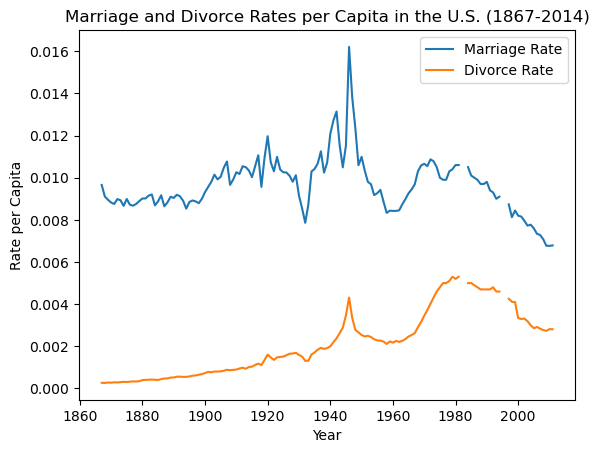

In [56]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col=0)

data['Marriage Rate'] = data['Marriages'] / data['Population'] 
data['Divorce Rate'] = data['Divorces'] / data['Population']

plt.plot(data['Marriage Rate'], label='Marriage Rate')
plt.plot(data['Divorce Rate'], label='Divorce Rate')

plt.xlabel('Year')
plt.ylabel('Rate per Capita')
plt.title('Marriage and Divorce Rates per Capita in the U.S. (1867-2014)')

plt.legend()

plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

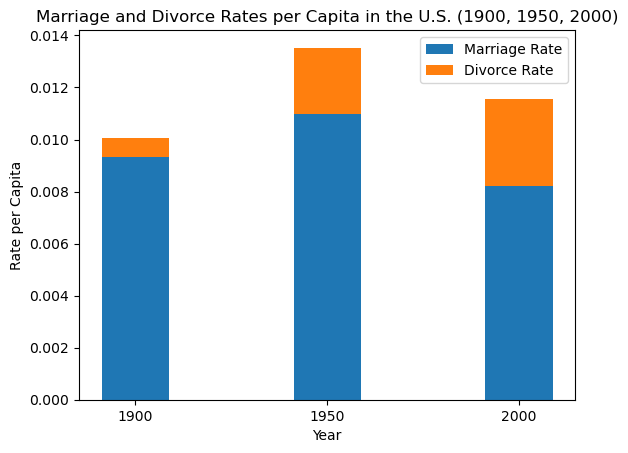

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in data from CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv', index_col=0)

data = data.loc[[1900, 1950, 2000]]

data['Marriage Rate'] = data['Marriages'] / data['Population']
data['Divorce Rate'] = data['Divorces'] / data['Population']

x = ['1900', '1950', '2000']
marriage_rates = data['Marriage Rate']
divorce_rates = data['Divorce Rate']
bar_width = 0.35

fig, ax = plt.subplots()
marriage_bar = ax.bar(x, marriage_rates, bar_width, label='Marriage Rate')
divorce_bar = ax.bar(x, divorce_rates, bar_width, bottom=marriage_rates, label='Divorce Rate')

ax.set_xlabel('Year')
ax.set_ylabel('Rate per Capita')
ax.set_title('Marriage and Divorce Rates per Capita in the U.S. (1900, 1950, 2000)')

ax.legend()

plt.show()

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!

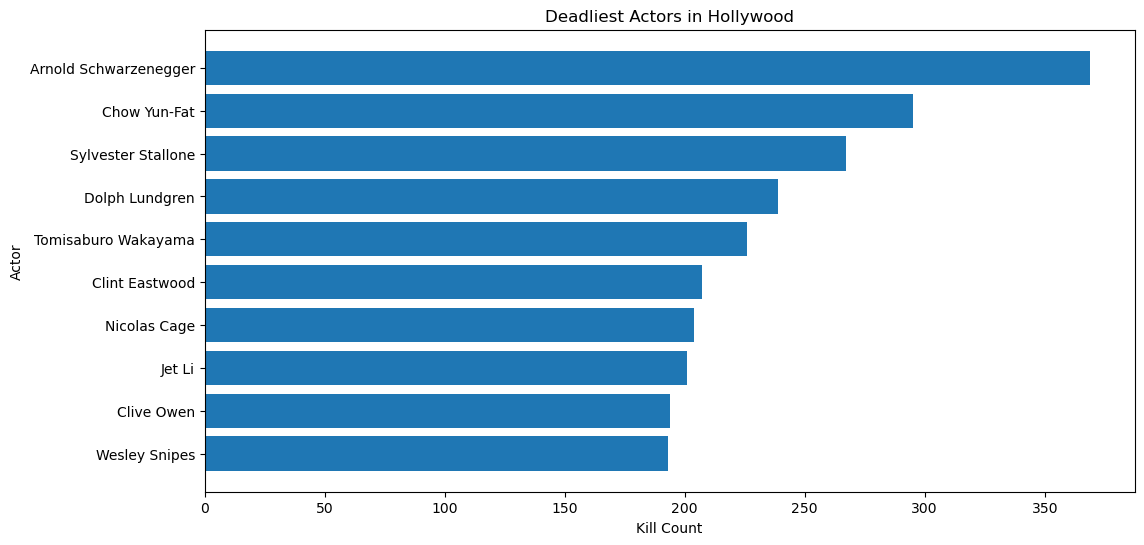

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')

data_sorted = data.sort_values('Count', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(data_sorted['Actor'], data_sorted['Count'])

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

plt.show()

## Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

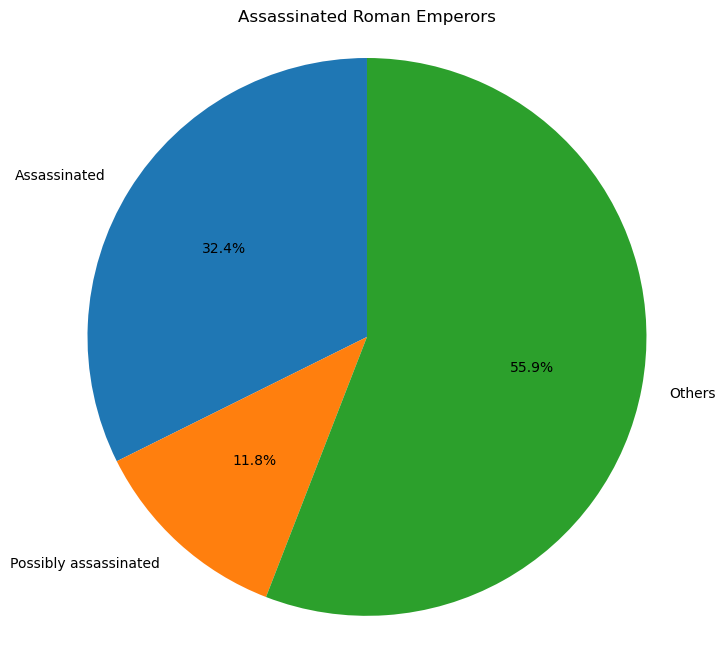

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')

cause_counts = data['Cause_of_Death'].value_counts()

assassinations = cause_counts[cause_counts.index.str.contains('Assassinated')].sum()
possibly_assassinated = cause_counts[cause_counts.index.str.contains('Possibly assassinated')].sum()

fraction_assassinated = assassinations / cause_counts.sum()
fraction_possibly_assassinated = possibly_assassinated / cause_counts.sum()

plt.figure(figsize=(8, 8))
labels = ['Assassinated', 'Possibly assassinated', 'Others']
sizes = [fraction_assassinated, fraction_possibly_assassinated, 1 - (fraction_assassinated + fraction_possibly_assassinated)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Assassinated Roman Emperors')

plt.show()

## Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.<br>
Don't forget to label your axes! <br>
Color each dot according to its year.

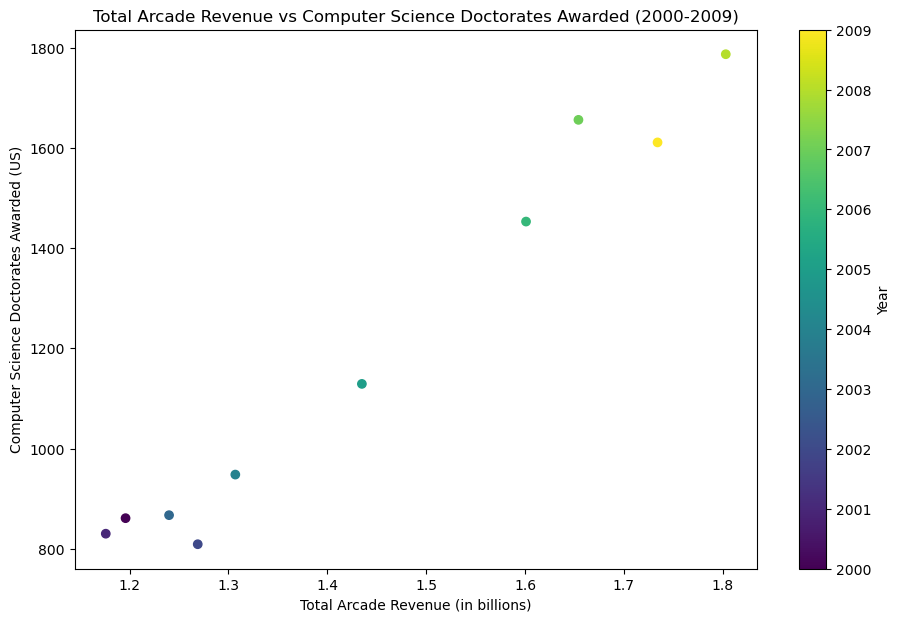

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

plt.figure(figsize=(11, 7))
scatter = plt.scatter(data['Total Arcade Revenue (billions)'],
                      data['Computer Science Doctorates Awarded (US)'],
                      c=data['Year'], cmap='viridis')

cbar = plt.colorbar(scatter)
cbar.set_label('Year')

plt.xlabel('Total Arcade Revenue (in billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Total Arcade Revenue vs Computer Science Doctorates Awarded (2000-2009)')

plt.show()